In [65]:
import pandas as pd

In [66]:
size=10000
data_df = pd.read_csv("../Datasets/dataset_"+str(size)+".csv")

In [67]:
x = data_df.drop(["Result"], axis=1).values
y = data_df["Result"].values

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [70]:
rf_regressor = RandomForestRegressor(random_state=0)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [71]:
y_pred_rf = rf_regressor.predict(x_test)

In [72]:
r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared score (Random Forest):", r2_rf)

R-squared score (Random Forest): -0.07416019475884794


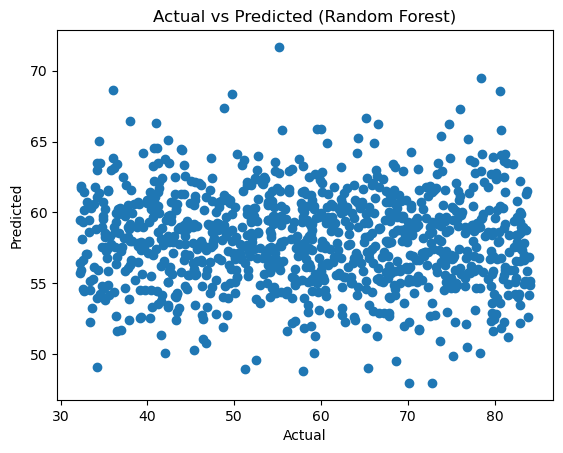

In [73]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Random Forest)")
plt.show()

In [74]:
difference_rf = y_test - y_pred_rf

In [75]:
pd.set_option('display.max_rows', None)

In [76]:
results_df_rf = pd.DataFrame({
    'x1': x_test[:,0],
    'x2': x_test[:,1],
    'x3': x_test[:,2],
    'x4': x_test[:,3],
    'Actual Result': y_test,
    'Predicted Result': y_pred_rf,
    'Difference': difference_rf
})
less_than_0 = results_df_rf[results_df_rf['Difference'] < 0]
equal_to_0 = results_df_rf[(results_df_rf['Difference'] >= 0) & (results_df_rf['Difference'] < 1)]
greater_than_0 = results_df_rf[results_df_rf['Difference'] > 1]

less_than_0_sorted = less_than_0.sort_values(by='Difference', ascending=False)
equal_to_0_sorted = equal_to_0.sort_values(by='Difference')
greater_than_0_sorted = greater_than_0.sort_values(by='Difference')

In [77]:
# less_than_0_sorted

In [78]:
# equal_to_0_sorted.shape

In [79]:
# equal_to_0_sorted

In [80]:
# greater_than_0_sorted